### standard import block

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### What we are covering

In [36]:
what_we_are_covering = [
'0. An end to end Scit-Learn Workflow',
'1. Getting the data ready',
'2. Choose  the right estimator / algorithm for our problems',
'3. Fit the model/algorithm and use it to  make predictions on our',
'4 . Evaluate the model',
'5. Improve the model',
'6. Save and Load  a trained model',
'7. Putting it all together']

In [5]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Step 1: Getting our data ready for machine learning
Three main things:
  1. split the data into features and labels (usually X and Y)
  2. Filling (also called imputing ) or disregarding missing values
  3. Converting non-numerical values to numerical values (also called feature encoding)
    

In [4]:
X = heart_disease.drop("target",axis=1)
X.head()

NameError: name 'heart_disease' is not defined

In [4]:
Y = heart_disease["target"]
Y.head(3)

0    1
1    1
2    1
Name: target, dtype: int64

In [5]:
## Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size=0.2)

In [6]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [7]:
X.shape

(303, 13)

In [8]:
len(heart_disease)

303

In [9]:

303*0.8

242.4

### 1.1 Make sure the data is numerical

In [10]:
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head(3)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343


In [11]:
len(car_sales)

1000

In [12]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [13]:
# Split into X and Y
X = car_sales.drop("Price",axis=1)
Y = car_sales["Price"]

# Split into test and train data sets
X_train,X_test,Y_train,Y_test = train_test_split(X,
                                                Y,
                                                test_size=0.2)

In [14]:
# Build the machine learning model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

ValueError: could not convert string to float: 'Toyota'

In [ ]:
car_sales.head(3)

In [ ]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")
transformed_X = transformer.fit_transform(X)

transformed_X

In [15]:
pd.DataFrame(transformed_X)

NameError: name 'transformed_X' is not defined

### One hot encoding
One hot encoding using pandas funtion dummies()

In [16]:
dummies = pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [17]:
# Since now the categorical variables have been converted to numbers
# Lets refit the model
np.random.seed(42)
X_train,X_test,Y_train,Y_test = train_test_split(transformed_X,Y,test_size=0.2)

model.fit(X_train,Y_train)

NameError: name 'transformed_X' is not defined

In [18]:
model.score(X_test, Y_test)

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### 1.2 What if there are missing values?
1. Fill them with some value (also known as imputation)
2. Remove the samples with missing data altogether

In [19]:
# Import car sales missing data
car_sales_missing = pd .read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [20]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64


### Option 1: using Pandas:Fill missing values

In [21]:
# Fill the 'Make' column for the missing values
car_sales_missing["Make"].fillna("missing",inplace=True)

# Fill the 'Colour' column for the missing values 
car_sales_missing["Colour"].fillna("missing",inplace=True)

# Fill the 'Odometer (KM)' column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

# Fill the "Doors" column
car_sales_missing["Doors"].fillna(4,inplace=True)

In [22]:
## Check the Dataframe for missing values
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [23]:
# Remove rows with missing Price value- because we cannot impute Price as it is a target value
car_sales_missing.dropna(inplace=True)

In [24]:
# Check dataframe for missing Price values
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [25]:
# Lets change the data into X aand Y, create X and Y
X = car_sales_missing.drop("Price",axis=1)
Y = car_sales_missing["Price"]

In [26]:
## Lets do the one Hot encoding
# Turn Categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Option 2: Fill missing values with ScitKit- Learn

In [27]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head(10)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [28]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [29]:
# Drop the rows without any Price
car_sales_missing.dropna(subset=["Price"],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [30]:
# Split into X and Y
X = car_sales_missing.drop("Price",axis=1)
Y = car_sales_missing["Price"]

In [31]:
X.head(3)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0


In [32]:
Y.head(3)

0    15323.0
1    19943.0
2    28343.0
Name: Price, dtype: float64

In [33]:
# fill data for missing values using scitkit learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant",fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make","Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ("cat_imputer",cat_imputer,cat_features),
("door_imputer",door_imputer,door_features),
("num_imputer",num_imputer,num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X 

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [34]:
car_sales_filled = pd.DataFrame(filled_X,columns=["Make","Colour","Doors","Odometer (KM)"])

In [35]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [36]:
# checking the imputations
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [37]:
## Lets do the one Hot encoding
# Turn Categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",one_hot,categorical_features)],remainder="passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [38]:
## Now our data is numbers and filled
## Lets fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Split the data into train and test
X_train,X_test,Y_train,Y_test = train_test_split(transformed_X,Y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)


0.21990196728583944

In [39]:
what_we_are_covering

NameError: name 'what_we_are_covering' is not defined

## 2. Choosing the right algorithm

Note - Scitkit Learn uses the term 'estimator' for machine learning algorithm or model

Two main types

Classification = predicting whether something is one thing or the other

Regression = predicting a number


Often the hardest part of solving a machine learning problem can be finding the right estimator for the job
Different estimators are better suited for different types of data and different problems
The flowchart below is designed to give users a bit of a rough guide on how to approach problems with regard to which estimators to try on your data.


<img src ="data/ml_map.png">

### 2.1 Picking a machine learning model for a regression problem

In [40]:
# Import Bosteon housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston;

In [41]:
boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [42]:
# How many samples??
len(boston_df)

506

In [43]:
## Let tyr the Ridge Regression model
from sklearn.linear_model import Ridge
# set up a random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

# Split inro train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Instantialting the Ridge Model
model = Ridge()
model.fit(X_train,Y_train)

# Check the score of the Ridge model on the test data
model.score(X_test,Y_test)

0.6662221670168522

How do we improve this score??
What if the Ridge was not working ???

Check the map again, to see a better algorithm alternative

In [44]:
# lets try the Random Forest Regressor as per the diagram
from sklearn.ensemble import RandomForestRegressor

# Set up the random seed
np.random.seed(42)

# Create the data X and Y
X =  boston_df.drop("target",axis=1)
Y = boston_df["target"]

# Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Instantiate the Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

# Evaluate the Random Forest Regressor
rf.score(X_test,Y_test)

0.8654448653350507

In [45]:
# Check both models side by side
# Check the Ridge Model
model.score(X_test,Y_test)


0.6662221670168522

In [46]:
# Check the Random Forest Regressor
rf.score(X_test,Y_test)

0.8654448653350507

### 2.2 Choosing the estimator for a classification problem
#### Lets go to the map

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [47]:
# upload the data
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [48]:
len(heart_disease)

303

Consulting the map and it says LineraSVC


>>> from sklearn.svm import LinearSVC


In [49]:
# Import the Linear SVC estimator class
from sklearn.svm import LinearSVC

#Set up Random Seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#Split the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate LinearSVC
clf = LinearSVC(max_iter=10000)
clf.fit(X_train,y_train)

#Evalute the lineraSVC
clf.score(X_test,y_test)



D:\machinelearning\PythonLibraries\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8688524590163934

In [50]:
# Lets Randon Forest Clasifier as per the estimator selector

In [51]:
# Import the RandomForest estimator class
from sklearn.ensemble import RandomForestClassifier

#Set up Random Seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#Split the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForest Classifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

#Evalute the RandomForest Classifier
clf.score(X_test,y_test)


0.8524590163934426

#### Learning Point
1. If you have structured data, use ensemble methods
2. If you have unstructured data use deep learning or transfer learning

## 3. fit the model on our data and use it to make prediction

### 3.1 Fitting the model to the data

Different Names for
'X' = features, feature variables, data

'y' = labels,target, target variables, ground truths

In [52]:
# Import the RandomForest estimator class
from sklearn.ensemble import RandomForestClassifier

#Set up Random Seed
np.random.seed(42)

# Make the data
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#Split the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForest Classifier
clf = RandomForestClassifier()

# FIT THE MODEL TO THE DATA
clf.fit(X_train,y_train)

#Evalute the RandomForest Classifier
clf.score(X_test,y_test)


0.8524590163934426

#### 3.2 make prediction on data it has not seen

2 ways to make the predictions:


1.predict()

2.predict_proba()

In [53]:
X_test.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1


In [54]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [55]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [56]:
## compare predictions to the truth labels to evaluate the models
y_preds =clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [57]:
clf.score(X_test,y_test)

0.8524590163934426

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

## Make predictions with predict_proba()

In [59]:
# predict_proba() returns the probabbilities of  aclassification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [60]:
# lets predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

### how to use predict with Regressions??
Predict can also be used for regression model


In [61]:
# Using Predict on Regression problems

from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data
X=boston_df.drop("target",axis=1)
y = boston_df["target"]

# Split the data into training ans test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor()
model.fit(X_train,y_train)

# Make Predicts
y_preds = model.predict(X_test)

In [62]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [63]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [64]:
# Compare the predicts to truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)


2.136382352941176

### 4. Evaluating a ML model

There are 3 different APIs for evaluating the quality of a model’s predictions:

Estimator score method: Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve. This is not discussed on this page, but in each estimator’s documentation.

Scoring parameter: Model-evaluation tools using cross-validation (such as model_selection.cross_val_score and model_selection.GridSearchCV) rely on an internal scoring strategy. This is discussed in the section The scoring parameter: defining model evaluation rules.

Metric functions: The metrics module implements functions assessing prediction error for specific purposes. These metrics are detailed in sections on Classification metrics, Multilabel ranking metrics, Regression metrics and Clustering metrics.

Finally, Dummy estimators are useful to get a baseline value of those metrics for random predictions.

https://scikit-learn.org/stable/modules/model_evaluation.html

In [65]:
from sklearn.ensemble import  RandomForestClassifier
np.random.seed(42)
X= heart_disease.drop("target",axis=1)
y =heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

### Three ways to evaluate Scikit Learn estimators
1.Estimator 'score' method

2. The 'scoring parameter'

3. Problem specificmetric functions

In [66]:
# 4.1 Evaluating the model using score method
clf.score(X_test,y_test)
# Claassification algorithm return mean acuuracy for score

0.8524590163934426

In [67]:
## Lets do the same but for regression

from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)

# Create the data
X=boston_df.drop("target",axis=1)
y = boston_df["target"]

# Split the data into training ans test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [68]:
model.score(X_test,y_test)
# Regression models return score on the basis of R^2

0.8654448653350507

In [69]:
### 4.2 Evaluating a model using the scoring paramaeter

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import  RandomForestClassifier
np.random.seed(42)
X= heart_disease.drop("target",axis=1)
y =heart_disease["target"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20)

clf = RandomForestClassifier()
clf.fit(X_train,y_train);

In [71]:
clf.score(X_test,y_test)

0.8524590163934426

In [72]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [73]:
np.random.seed(42)

#Single training and seat split score
clf_single_score = clf.score(X_test,y_test)

# Take the mean of 5 fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,y))

# compare the 2 scores
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [74]:
# Default scoring parameter of a classifier is the mean accuracy
# This denoted by setting Scoring Parameter to 'None'....'None' is the default which implies that mean accuracy will be used
# If we want to use any other scoring parameter then we need specify that in the argument
np.random.seed(42)
cross_val_score(clf,X,y,scoring=None)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

### 4.2.1 Classification model evaluation metrics

 1. Accuracy

 2.Area under ROC curve

 3. Confusion matrix

 4. Classification report

In [75]:
## 1. Accuracy
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X= heart_disease.drop("target",axis=1)
y = heart_disease["target"]

# we will directly use cross validation hence no need to split into 20% test data
clf = RandomForestClassifier()
cross_val_score=cross_val_score(clf,X,y)

In [76]:
np.mean(cross_val_score)

0.8248087431693989

In [77]:
print(f"Heart Diease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Diease Classifier Cross-Validated Accuracy: 82.48%


** Area under the RECIVER OPERATING CHARACTERISTIC CURVE (AUC/ROC)**
*Area under curve(AUC)
*RoC curve

ROC curvesare a comparision of a model's true positive rate (TPR) versus a models false positive  rate (FPR)

* True Positive = model predicts 1 and when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1


In [78]:
# Create X_test....etc
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [79]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train,y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [80]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [81]:
# Claculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test,y_probs_positive)

# Check for false positive rates

fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

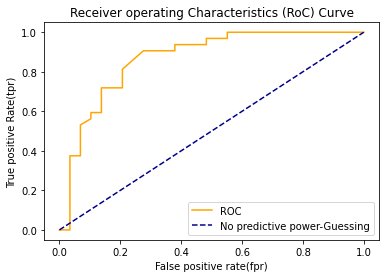

In [82]:
# Create a function for plotting ROC curve

def plot_roc_curve(fpr,tpr):
    """
    PLots a ROC curve given the false positive rate (fpr) and true positive rate (tpr)
    of a model
    """
    plt.plot(fpr,tpr,color="orange",label="ROC")    
    
    #plot line with no predictive power(baseline)
    plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="No predictive power-Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate(fpr)")
    plt.ylabel("True positive Rate(tpr)")
    plt.title("Receiver operating Characteristics (RoC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [83]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

### Confusion Matrix
Confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict
In essence giving an idea where model is confused

In [84]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [85]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
           y_preds,
           rownames=["Actual Labels"],
           colnames =["Predicted Names"])

Predicted Names,0,1
Actual Labels,,
0,23,6
1,6,26


In [86]:
# How to install a conda package into the current env from Jupyter notebook
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.5

Please update conda by running

    $ conda update -n base -c defaults conda




<AxesSubplot:>

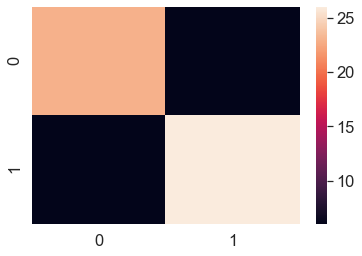

In [87]:
# Make our confusion matrix more visual with Seaborns Heatmap()
import seaborn as sns

# Set the scale for font 
sns.set(font_scale =1.5)

# Create confusion matrix
conf_mat = confusion_matrix(y_test,y_preds)

# Plot using Seaborn
sns.heatmap(conf_mat)

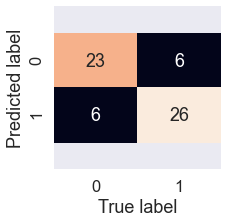

In [88]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using seaborns' heatmap
    """
    fix,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot =True,
                    cbar =False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    # Fix broken annotation
    bottom,top = ax.get_ylim()
    ax.set_ylim(bottom +0.5,top-0.5);
    
plot_conf_mat(conf_mat)

## Classification Report

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [90]:
## where precision and recall become important
disease_true = np.zeros(10000)
disease_true[0]=1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

D:\machinelearning\PythonLibraries\env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


 ## 4.23 Finally using the scoring parameter

In [91]:
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()



In [93]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [94]:
# Crosss validated accuracy 
print(f"Cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%" )

Cross validated accuracy is: 82.48%


In [95]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [96]:
## Since scoring parametr by default is None and that implies that it is accuracy
# if we use scoring = "accuracy"; we should get the same results as 
# above that is 82.48% mean score ..(array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333]))

np.random.seed(42)
cv_acc =  cross_val_score(clf,X,y,scoring = "accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [97]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,scoring="accuracy")
print(f"Cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%" )

Cross validated accuracy is: 82.48%


## Using Precision

In [98]:
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y, scoring ="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [99]:
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y, scoring ="precision")
np.mean(cv_precision)

0.8329547346025924

## Using Recall

In [100]:
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y, scoring ="recall")
np.mean(cv_recall)

0.8545454545454545

## Using f1

In [101]:
cv_f1 = cross_val_score(clf,X,y,scoring ="f1")
np.mean(cv_f1)

0.8231854226519981

## Summary
#### Classification Performance Parameters

Classification Model Evaluation Metrics/Techniques

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

##  For Regression MOdel

In [102]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X=boston_df.drop("target",axis=1)
y=boston_df["target"]

rgr =  RandomForestRegressor()


### r2

In [103]:
np.random.seed(42)
cv_r2 = cross_val_score(rgr,X,y,scoring = None)
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

In [104]:
np.random.seed(42)
cv_r2 = cross_val_score(rgr,X,y,scoring = "r2")
cv_r2

array([0.77231143, 0.86035935, 0.74664002, 0.47632078, 0.26630379])

## Mean Absolute Error

In [105]:
cv_MAE = cross_val_score(rgr,X,y,scoring="neg_mean_absolute_error")
cv_MAE

array([-2.13045098, -2.49771287, -3.45471287, -3.81509901, -3.11813861])

## Mean Square Error

In [106]:
cv_MSE = cross_val_score(rgr,X,y,scoring = "neg_mean_squared_error")
cv_MSE

array([ -7.8141513 , -12.94343325, -19.11614042, -46.28783248,
       -19.48161818])

In [107]:
print(f"Mean Absolute Error: {np.mean(cv_MAE)}.....Mean Square Error:..{np.mean(cv_MSE)}")

Mean Absolute Error: -3.003222869345758.....Mean Square Error:..-21.12863512415064


## 4.3 Using different evaluation metrics as scikit-Learn functions

*** Classification Evaluation Functions ***

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

#Split the data 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier

print("Classifier metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"F1 : {f1_score(y_test,y_preds)}")

Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
F1 : 0.8615384615384615


***** Regression Evaluation Functions *****

In [109]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target",axis=1)
y = boston_df["target"]

X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2)

rgr = RandomForestRegressor()
rgr.fit(X_train,y_train)

# Make predictions using our regression model
y_preds = rgr.predict(X_test)

# Evaluate the regression model
print("Regression Model Metrics on the test set")

print(f"R^2: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

Regression Model Metrics on the test set
R^2: 0.8654448653350507
MAE: 2.136382352941176
MSE: 9.867437068627442


### 5.Improving a Model

######  First prediction = baseline predictions
First Model = baseline model

Ways to improve data
* From data prespective
** Could we collect more data?(Generally more data the better?
** Could we improve our data?

From a model perspective
* is there a better model available?
* could we improve the current model?

##### Hyper-parameters vs Parameters

Parameters = model find these patterns in the data


Hyperparameters = settings on a model that you can adjust to potentially improve its ability to find patterns

###### Three ways to adjust hyper-parameters
1. By hand
2. randomly with RandomsearchCV
3. Exhaustively with GridSearchCV

In [110]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

###### Calling the hyperparamters of a model
Once a model is instantiated the Hyperparameters by calling 
###### clf.get_params()

In [112]:
clf.get_params()
# these pramas can be modified to improve the model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 5.1 Tuning Hyper parameter by hand
Here we make three sets training,validation and test sets

Here we will try and adjust following:
* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
*  `n_estimators`

In [2]:
# Since we will be doing the evaluation on more than one model
# better to create a function

def evaluate_preds(y_true,y_preds):
    '''
    Performs evaluation comparison on y_true labels vs the y_preds
    '''
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    
    metric_dict = {"accuracy":round(accuracy,2),
                  "precision":round(precision,2),
                  "recall":round(recall,2),
                  "f1":round(f1,2)}
    print(f"Accuracy: {accuracy*100:.2f}%")
    print(f"Precision: {precision*100:.2f}%")
    print(f"recall: {recall*100:.2f}%")
    print(f"f1: {f1*100:.2f}%")
    
    return metric_dict
    

In [8]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X&y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split the data into validation and test sets
train_split = round(0.7*len(heart_disease_shuffled)) #70% of the data
valid_split = round(train_split+0.15*len(heart_disease_shuffled))
X_train, y_train = X[:train_split],y[:train_split]
X_valid, y_valid = X[train_split:valid_split],y[train_split:valid_split]
X_test, y_test = X[valid_split:],y[valid_split:]

clf = RandomForestClassifier(n_estimators=10)

clf.fit(X_train,y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaludate the classifier on the validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)

baseline_metrics


Accuracy: 80.00%
Precision: 76.67%
recall: 92.00%
f1: 83.64%


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [9]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf2 = RandomForestClassifier(n_estimators=1000)
clf2.fit(X_train,y_train)

# Make Predictions with differnt hyperparameters
y_preds_2 = clf2.predict(X_valid)

# Evaluate the second classifier
clf2_metrics = evaluate_preds(y_valid,y_preds_2)

Accuracy: 82.22%
Precision: 81.48%
recall: 88.00%
f1: 84.62%


In [126]:
clf_3 = RandomForestClassifier(n_estimators=1000,max_depth=10)

## 5.2 Hyperparammeter tuning with RandomizedSearchCV

In [11]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features": ["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

np.random.seed(42)

# SPlit into X and y
X = heart_disease_shuffled.drop("target",axis=1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Set up RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator =clf,param_distributions=grid,
                           n_iter=10,# number of models to try
                           cv=5,
                           verbose=2)
# Fit the randomizedSearchCV version of clf
rs_clf.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.6s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   21.2s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [12]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [13]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaludate the prediction
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Accuracy: 81.97%
Precision: 77.42%
recall: 85.71%
f1: 81.36%


### 5.3 Hyperparametr tuning with GridSearchCV

In [14]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [15]:
## GridSearchCV will not check randomly , but will go with each combination of the grid
## Will take a lot of computing power

<AxesSubplot:>

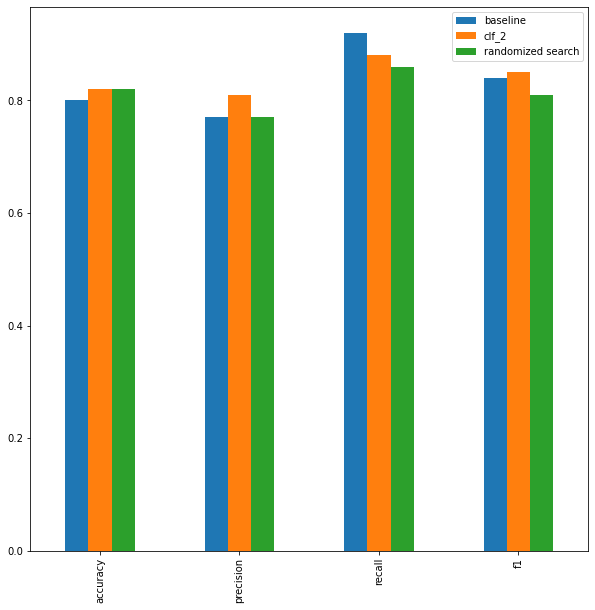

In [19]:
#### Compaare different models

compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                               "clf_2":clf2_metrics,
                               "randomized search":rs_metrics})
compare_metrics.plot.bar(figsize=(10,10))

## 6 Save and Load the model (already trained model)

Two waays to save and load trained machine learning models

1. using pythons pickle module
2. using joblib

In [21]:
import pickle
#Save an existing model to a file
pickle.dump(clf,open("heart_random_forest_model_1.pk1","wb"))

In [22]:
# Load a saved model
loaded_pickle_model = pickle.load(open("heart_random_forest_model_1.pk1","rb"))

## Using Joblib

Dump and load

In [ ]:
from joblib import dump,load

# Save a model to a file
dump(clf,filename="clf_model_1.joblib")

# load a saved joblib model
loaded_job_model = load(filename="clf_model_1.joblib")